# Welcome to the jupyter notebook for Ro-Vibrational Spectrscopy!
### Created Fall 2022: J. A. DePaolo-Boisvert

In [1]:
# Importing Packages which are like collections of code that groups of people will find useful
# Some packages are widely known and applied while others can be much more niche
import numpy as np #invokes numpy commands with np.command()
import scipy as sp
import scipy.constants as cons #constants is a submodule of scipy that we want easy access to
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(title, xs, ys, xlabel, ylabel):
    plt.clf()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    _ = plt.plot(xs, ys)
    plt.show()

In [2]:
#Defining Constants
h = cons.Planck
kb = cons.Boltzmann
c = cons.c
amutokg = 1.66E-27
evtojoule = 1.602176634E-19 #Multiplicative conversions
temp = 300

In [3]:
#Define the diatomic molecule here
mass1 = 1.007825 *amutokg
mass2 = 34.968853 *amutokg
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903

#Define bond strength (N/m)
k_force = 481

### 'From Physics we know that the vibrational frequency of a harmonic' oscillator is
$f = \frac{1}{2*\pi}*\sqrt{k/\mu}$

In [4]:
# First a small function to calculate the reduced mass of two bodies
# A more efficient method than
# def reduced_mass(m1, m2):
#     mu = (m1*m2)/(m1+m2)
#     return mu
# Is with lambda functions

reduced_mass = lambda m1, m2: (m1*m2)/(m1+m2)
mu = reduced_mass(mass1, mass2)

Freq = lambda k_force, mu: np.sqrt(k_force/mu)/(2*cons.pi)
freq_vib = Freq(k_force, mu)
freq_vib_wvnm = freq_vib/(cons.c*100)
print(freq_vib, freq_vib_wvnm)

86559730990621.44 2887.3218348482083


#### From Equation 1 of the text
The energy levels of a harmonic oscillator are given by the base frequency and the level number.
$$
E(\nu_o, \nu) = h\nu_0(\nu+1/2)
$$


In [5]:
e_vib_levels = lambda base_freq, level : h*base_freq*(level+0.5)

#Lets say we want to see the frequencies of the first 10 energy levels
#of this oscillator
E_levels = e_vib_levels(freq_vib, np.arange(0,10)) #Note that this calls for the frequency in Hz
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

1443.6609174241044
4330.982752272313
7218.304587120521
10105.62642196873
12992.948256816937
15880.270091665148
18767.591926513356
21654.913761361564
24542.23559620977
27429.557431057983


#### From Equation 2 of the text
$$
E(B_e, J) = \frac{h^2}{8 \pi^2 I}J(J+1) = B_eJ(J+1)
$$

In [6]:
# Now to calculate the rotational part
# this requires defining the internuclear distance r_nuc
r_nuc = 1.27E-10 #1.27 angstroms

# Since the reduced mass is known, the moment of inertia is readily calculable
Moment = lambda r_nuc : mu*(r_nuc**2)
mom_I = Moment(r_nuc)

fB_e = lambda r_nuc : ((cons.h**2)/(8*(cons.pi**2)*mu*(r_nuc**2)))

e_rot_levels = lambda B_e, level: B_e*(level*(level+1))

E_levels = e_rot_levels(fB_e(r_nuc), np.arange(0,10))
#Now lets see the first 10 rotational energies
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

0.0
21.345906577291533
64.03771973187459
128.07543946374918
213.45906577291532
320.188598659373
448.2640381231222
597.6853841641629
768.4526367824951
960.565795978119


#### Based on equation 4 on page 417 of the text, The addition of several correctional factors yields a strong expression for the molecule's physical energy levels
$$
 T(\nu,J) = E_{vib} + E_{rot} + Anharmonicty + Centrifugal + Coupling
$$

$$
 T(\nu,J) = \nu_e(\nu+\frac{1}{2}) + B_eJ(J+1) - \nu_e\chi_e(\nu+\frac{1}{2})^2 - D_eJ^2(J+1)^2 - \alpha_e(\nu+\frac{1}{2})J(J+1)
$$

This equation has a total of 5 parameters, thus

$$
T(\nu,J) = T(\nu,J |\nu_e,\chi_e,B_e,D_e,\alpha_e)
$$

In [7]:
T_levels = lambda nu, J, nu_e, chi_e, B_e, D_e, a_e : (nu_e*(nu+0.5)) + B_e*J*(J+1) - nu_e*chi_e*(nu+0.5)**2 - D_e * J**2 * (J+1)**2 - a_e*(nu+0.5)*J*(J+1)

In [8]:
# Retrieve these values for HCl from NIST, and
# generate a matrix of the first 2 vibrational levels, by 25 rotational levels
# 
nu_e = 1
chi_e = 1
B_e = 1
D_e = 1
a_e = 1
nu_max = 1
J_max = 1
levels = np.array([[T_levels(i, j, nu_e, chi_e, B_e, D_e, a_e) for j in range(J_max)] for i in range(nu_max)])

In [9]:
levels

array([[ 1482.24525   ,  1503.12192224,  1544.86250016,  1607.44145064,
         1690.820474  ,  1794.948504  ,  1919.76170784,  2065.18348616,
         2231.12447304,  2417.482536  ,  2624.142776  ,  2850.97752744,
         3097.84635816,  3364.59606944,  3651.060696  ,  3957.061506  ,
         4282.40700104,  4626.89291616,  4990.30221984,  5372.405114  ,
         5772.959034  ,  6191.70864864,  6628.38586016,  7082.70980424,
         7554.38685   ],
       [ 4367.50725   ,  4387.76952224,  4428.28130016,  4489.01705064,
         4569.938474  ,  4670.994504  ,  4792.12130784,  4933.24228616,
         5094.26807304,  5275.096536  ,  5475.612776  ,  5695.68912744,
         5935.18515816,  6193.94766944,  6471.810696  ,  6768.595506  ,
         7084.11060104,  7418.15171616,  7770.50181984,  8140.931114  ,
         8529.197034  ,  8935.04424864,  9358.20466016,  9798.39740424,
        10255.32885   ]])

## Boltzmann Distribution
The boltzmann distribution assigns a probability to an energy level based on the temperature:
$$
P_i = e^{\frac{-E_i}{k_b*Temp}}
$$

In [10]:
boltzmann_prob = lambda energies, temp : np.exp(-1*energies/(cons.Boltzmann*temp))

Populate the energy levels that were previously created with Boltzmann probability.

In [11]:
#Convert levels to joules
boltzmann_pop = boltzmann_prob(levels*cons.h*cons.c*100, temp)
print(boltzmann_pop)

[[8.17929857e-04 7.40002580e-04 6.05751041e-04 4.48695846e-04
  3.00806104e-04 1.82559451e-04 1.00331667e-04 4.99513600e-05
  2.25381527e-05 9.22069711e-06 3.42233840e-06 1.15308629e-06
  3.52917200e-07 9.81917711e-08 2.48550299e-08 5.72878717e-09
  1.20342532e-09 2.30626451e-10 4.03631119e-11 6.45839133e-12
  9.45874426e-13 1.26953254e-13 1.56355738e-14 1.76940985e-15
  1.84246511e-16]
 [8.00145007e-10 7.26048397e-10 5.97841286e-10 4.46768843e-10
  3.03065339e-10 1.86660506e-10 1.04415348e-10 5.30678531e-11
  2.45154634e-11 1.02991844e-11 3.93694198e-12 1.37017032e-12
  4.34452158e-13 1.25597302e-13 3.31310567e-14 7.98140162e-15
  1.75756260e-15 3.54124235e-16 6.53530334e-17 1.10590988e-17
  1.71799873e-18 2.45305263e-19 3.22351891e-20 3.90371324e-21
  4.36276186e-22]]


In [12]:
# This can be normalized to sum to one, if desired
normalized_boltzmann_pop = boltzmann_pop/np.sum(boltzmann_pop)
print(normalized_boltzmann_pop, np.sum(normalized_boltzmann_pop))

[[2.49152475e-01 2.25414774e-01 1.84519944e-01 1.36678811e-01
  9.16295996e-02 5.56100730e-02 3.05623802e-02 1.52158585e-02
  6.86542554e-03 2.80874880e-03 1.04249047e-03 3.51245648e-04
  1.07503343e-04 2.99105389e-05 7.57117762e-06 1.74506590e-06
  3.66579597e-07 7.02519301e-08 1.22951487e-08 1.96731318e-09
  2.88126118e-10 3.86716749e-11 4.76280684e-12 5.38986125e-13
  5.61239743e-14]
 [2.43734970e-07 2.21164142e-07 1.82110525e-07 1.36091820e-07
  9.23177931e-08 5.68593097e-08 3.18063244e-08 1.61651844e-08
  7.46774107e-09 3.13727059e-09 1.19924567e-09 4.17372375e-10
  1.32339992e-10 3.82586334e-11 1.00921671e-11 2.43124267e-12
  5.35377290e-13 1.07871022e-13 1.99074161e-14 3.36875078e-15
  5.23325604e-16 7.47232942e-17 9.81927373e-18 1.18912375e-18
  1.32895615e-19]] 1.0


In [13]:
print(np.sum(normalized_boltzmann_pop, 1)) #Distribution of vibrational states (summing across rotations))
print(np.sum(normalized_boltzmann_pop, 0)) #Distribution of rotational states (summing across vibrations))

[9.99999007e-01 9.92655488e-07]
[2.49152719e-01 2.25414996e-01 1.84520126e-01 1.36678947e-01
 9.16296920e-02 5.56101298e-02 3.05624120e-02 1.52158747e-02
 6.86543301e-03 2.80875194e-03 1.04249167e-03 3.51246065e-04
 1.07503475e-04 2.99105771e-05 7.57118771e-06 1.74506833e-06
 3.66580133e-07 7.02520380e-08 1.22951686e-08 1.96731655e-09
 2.88126641e-10 3.86717496e-11 4.76281666e-12 5.38987314e-13
 5.61241072e-14]


## Selection Rules for spectroscopy
#### Calculating energy levels is good, but the key to spectra is the transitions between energy levels
 Here is a summary of the selection rules: \
$\Delta \nu$ = +/-1 and $\Delta J$ = +/-1 $ \
Any transition must satisfy both of these simultaneously


In [14]:
levels

array([[ 1482.24525   ,  1503.12192224,  1544.86250016,  1607.44145064,
         1690.820474  ,  1794.948504  ,  1919.76170784,  2065.18348616,
         2231.12447304,  2417.482536  ,  2624.142776  ,  2850.97752744,
         3097.84635816,  3364.59606944,  3651.060696  ,  3957.061506  ,
         4282.40700104,  4626.89291616,  4990.30221984,  5372.405114  ,
         5772.959034  ,  6191.70864864,  6628.38586016,  7082.70980424,
         7554.38685   ],
       [ 4367.50725   ,  4387.76952224,  4428.28130016,  4489.01705064,
         4569.938474  ,  4670.994504  ,  4792.12130784,  4933.24228616,
         5094.26807304,  5275.096536  ,  5475.612776  ,  5695.68912744,
         5935.18515816,  6193.94766944,  6471.810696  ,  6768.595506  ,
         7084.11060104,  7418.15171616,  7770.50181984,  8140.931114  ,
         8529.197034  ,  8935.04424864,  9358.20466016,  9798.39740424,
        10255.32885   ]])

In [15]:
# Typically we are only concerned with vibrational transitions from 0, 1.
r_transitions = levels[1,1:] - levels[0,:-1]
p_transitions = levels[1,:-1] - levels[0,1:]
print(r_transitions)
print(p_transitions)
print(levels[1,0] - levels[0,0])

[2905.52427224 2925.15937792 2944.15455048 2962.49702336 2980.17403
 2997.17280384 3013.48057832 3029.08458688 3043.97206296 3058.13024
 3071.54635144 3084.20763072 3096.10131128 3107.21462656 3117.53481
 3127.04909504 3135.74471512 3143.60890368 3150.62889416 3156.79192
 3162.08521464 3166.49601152 3170.01154408 3172.61904576]
[2864.38532776 2842.90702208 2820.83984952 2798.19657664 2774.98997
 2751.23279616 2726.93782168 2702.11781312 2676.78553704 2650.95376
 2624.63524856 2597.84276928 2570.58908872 2542.88697344 2514.74919
 2486.18850496 2457.21768488 2427.84949632 2398.09670584 2367.97208
 2337.48838536 2306.65838848 2275.49485592 2244.01055424]
2885.2620000000006


### Plot the boltzmann probability of the base state, against the transition wavelength

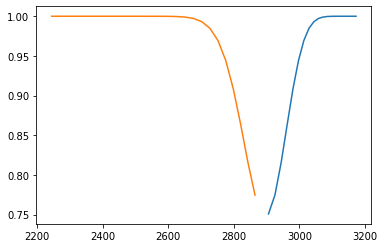

In [16]:
r_data = (r_transitions, 1 - normalized_boltzmann_pop[0,:-1])
p_data = (p_transitions, 1 - normalized_boltzmann_pop[0,1:])

plt.plot(*r_data)
plt.plot(*p_data)

## Generating A Spectrum

In [17]:
levels

array([[ 1482.24525   ,  1503.12192224,  1544.86250016,  1607.44145064,
         1690.820474  ,  1794.948504  ,  1919.76170784,  2065.18348616,
         2231.12447304,  2417.482536  ,  2624.142776  ,  2850.97752744,
         3097.84635816,  3364.59606944,  3651.060696  ,  3957.061506  ,
         4282.40700104,  4626.89291616,  4990.30221984,  5372.405114  ,
         5772.959034  ,  6191.70864864,  6628.38586016,  7082.70980424,
         7554.38685   ],
       [ 4367.50725   ,  4387.76952224,  4428.28130016,  4489.01705064,
         4569.938474  ,  4670.994504  ,  4792.12130784,  4933.24228616,
         5094.26807304,  5275.096536  ,  5475.612776  ,  5695.68912744,
         5935.18515816,  6193.94766944,  6471.810696  ,  6768.595506  ,
         7084.11060104,  7418.15171616,  7770.50181984,  8140.931114  ,
         8529.197034  ,  8935.04424864,  9358.20466016,  9798.39740424,
        10255.32885   ]])

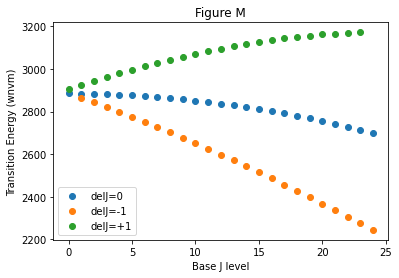

In [18]:
plt.clf()
plt.scatter(np.arange(J_max), levels[1,:] - levels[0,:])
plt.scatter(np.arange(1, J_max), p_transitions)
plt.scatter(np.arange(J_max -1), r_transitions)
plt.legend(['delJ=0',
            'delJ=-1',
            'delJ=+1'])
plt.xlabel('Base J level')
plt.ylabel('Transition Energy (wnvm)')
plt.title('Figure M')
plt.show()

### Description of Generated Spectrum
A spectrum will be generated as a sum of gaussians centered at each transition wavelength, with relative heights of the boltzmann weight of their base level.
$$
f(λ) = W_b e^\frac{-(λ - λ_0)^2}{2\sigma^2}
$$
With σ as an empirical bandwidth parameter.

In [19]:
#Define a Gaussian
Gaussian = lambda x, a, b, c : a*np.exp(-1*(x-b)**2 / (2*c**2))

In [20]:
#Define Coefficients
r_coeffs = normalized_boltzmann_pop[0,:-1] # Values of base levels where dJ += 1 is possible
p_coeffs = normalized_boltzmann_pop[0,1:] # Values of base levels where dJ -= 1 is possible

In [21]:
r_transitions, r_coeffs

(array([2905.52427224, 2925.15937792, 2944.15455048, 2962.49702336,
        2980.17403   , 2997.17280384, 3013.48057832, 3029.08458688,
        3043.97206296, 3058.13024   , 3071.54635144, 3084.20763072,
        3096.10131128, 3107.21462656, 3117.53481   , 3127.04909504,
        3135.74471512, 3143.60890368, 3150.62889416, 3156.79192   ,
        3162.08521464, 3166.49601152, 3170.01154408, 3172.61904576]),
 array([2.49152475e-01, 2.25414774e-01, 1.84519944e-01, 1.36678811e-01,
        9.16295996e-02, 5.56100730e-02, 3.05623802e-02, 1.52158585e-02,
        6.86542554e-03, 2.80874880e-03, 1.04249047e-03, 3.51245648e-04,
        1.07503343e-04, 2.99105389e-05, 7.57117762e-06, 1.74506590e-06,
        3.66579597e-07, 7.02519301e-08, 1.22951487e-08, 1.96731318e-09,
        2.88126118e-10, 3.86716749e-11, 4.76280684e-12, 5.38986125e-13]))

In [22]:
p_transitions, p_coeffs

(array([2864.38532776, 2842.90702208, 2820.83984952, 2798.19657664,
        2774.98997   , 2751.23279616, 2726.93782168, 2702.11781312,
        2676.78553704, 2650.95376   , 2624.63524856, 2597.84276928,
        2570.58908872, 2542.88697344, 2514.74919   , 2486.18850496,
        2457.21768488, 2427.84949632, 2398.09670584, 2367.97208   ,
        2337.48838536, 2306.65838848, 2275.49485592, 2244.01055424]),
 array([2.25414774e-01, 1.84519944e-01, 1.36678811e-01, 9.16295996e-02,
        5.56100730e-02, 3.05623802e-02, 1.52158585e-02, 6.86542554e-03,
        2.80874880e-03, 1.04249047e-03, 3.51245648e-04, 1.07503343e-04,
        2.99105389e-05, 7.57117762e-06, 1.74506590e-06, 3.66579597e-07,
        7.02519301e-08, 1.22951487e-08, 1.96731318e-09, 2.88126118e-10,
        3.86716749e-11, 4.76280684e-12, 5.38986125e-13, 5.61239743e-14]))

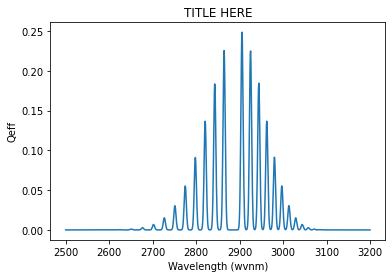

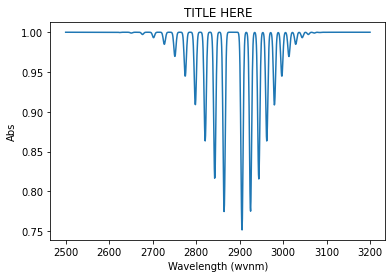

In [23]:
domain = np.linspace(2500,3200,1000)
sigma = 2.5

r_excitation_data = np.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in r_coeffs] for l_c in r_transitions])
p_excitation_data = np.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in p_coeffs] for l_c in p_transitions])

excitation_data = []
for i in range(r_excitation_data.shape[0]):
  excitation_data.append(r_excitation_data[i,i,:])
  excitation_data.append(p_excitation_data[i,i,:])
excitation_data = np.array(excitation_data)

plot_data('TITLE HERE', domain, excitation_data.sum(0), 'Wavelength (wvnm)', 'Qeff')
plot_data('TITLE HERE', domain, 1 - excitation_data.sum(0), 'Wavelength (wvnm)', 'Abs')

## Graph Real Data

In [24]:
#Obtain jcampdx from NIST, a common IR file format at
# https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C7647010&Index=0&Type=IR
# Save it to your google drive and point to it here
from IPython.testing import test
from google.colab import drive
drive.mount('/content/drive')
##################################################################
hcl_jcamp = '/content/drive/MyDrive/7647-01-0-IR.jdx'
#%cat $hcl_jcamp

Mounted at /content/drive


(708,)


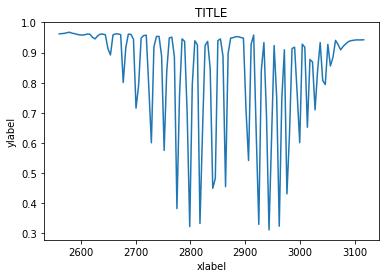

In [30]:
def get_jcamp_data(jcamp_fn):
  with open(jcamp_fn, 'r') as w:
    lines = [line[:-1] if line.endswith('\n') else line for line in w.readlines()]
  #print(lines)
  data_start = lines.index("##XYDATA=(X++(Y..Y))") + 1
  data_end = lines.index("##END=")
  #Data is averaged some number of times
  data_lines = lines[data_start:data_end]
  data = np.array([[float(element) for element in line.split(' ')] for line in data_lines])
  x_data = data[:,0]
  y_data = np.average(data[:,1:],1)
  return x_data, y_data

plt.clf()
#Now you plot data from NIST below this comment

plt.show()

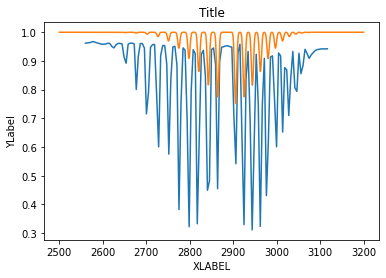

In [27]:
plt.clf()
#Now you plot data from NIST below this comment
xs, ys = get_jcamp_data(hcl_jcamp)
plt.plot(xs[450:570], ys[450:570])
plt.plot(domain, 1 - excitation_data.sum(0))
plt.title('Title')
plt.xlabel('XLABEL')
plt.ylabel('YLabel')
plt.show()

## Questions

### Edit this text cell to write your answers to the following questions below each question.

#### Explain the purpose of prefixes like np. and cons.

#### Explain the meaning/contribution of each term in the equation for T (from equation 4).

#### How does the boltzmann population differ between rotational and vibrational energy levels?  Are either well dispersed/isolated?

#### How do we know if we are using enough boltzmann levels to describe the molecular energy landscape?

#### Describe the selection rules for spectroscopy and the R and P branches.  Which is higher energy?  Why is there a "forbidden transition" between the two branches?

#### This is, principally, a single molecule analysis.  What effects or interactions that we have not described here can occur to a molecule present in a bulk/ensemble?

#### Describe and explain the behavior of Figure M.

#### How well does this analysis fit/mimick real spectroscopic data?

#### At what pressure of HCl was the spectrum from the NIST link taken?  What parameters were used in cell 8 of this notebook?

#### What (in your opinion) was the best assumption made in this analysis?

#### What (in your opinion) was the worst assumption made in this analysis?
